# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [944]:
# student 1: Maayan 2050
# student 2: Shalev 5644

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [947]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [948]:
# Load the datasets
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

# Display the first 5 rows
display(train_data.head())

display(test_data.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [949]:
# Summary statistics for the training dataset
print("\n==========================================")
print("Summary Statistics of the Training Dataset")
print("==========================================")
display(train_data.describe())
print("\nThis summary provides key statistical insights into the training data, including measures such as count, mean, standard deviation, min, max, and quartiles for each numeric feature.")

# Summary statistics for the test dataset
print("\n======================================")
print("Summary Statistics of the Test Dataset")
print("======================================")
display(test_data.describe())
print("\nThis summary provides key statistical insights into the test data, similar to the training dataset, helping to understand the distribution of features.")



Summary Statistics of the Training Dataset


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000



This summary provides key statistical insights into the training data, including measures such as count, mean, standard deviation, min, max, and quartiles for each numeric feature.

Summary Statistics of the Test Dataset


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2.363128,0.675978,30.366983,0.502793,0.368715,31.507239,0.351955,0.340782
std,0.812116,0.469321,12.246691,1.278053,0.819923,49.254330,0.639640,0.475302
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,24.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,12.000000,0.000000,0.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,27.825000,1.000000,1.000000
max,3.000000,1.000000,71.000000,8.000000,5.000000,263.000000,3.000000,1.000000



This summary provides key statistical insights into the test data, similar to the training dataset, helping to understand the distribution of features.


In [950]:
# Calculate the covariance matrix
cov_matrix = train_data.cov()  # Compute the covariance matrix for numeric columns

# Print the covariance matrix
print("=======================")
print("Covariance Matrix")
print("=======================")
display(cov_matrix)
print("\nThe covariance matrix indicates how much two random variables change together. A positive value suggests that as one variable increases, the other tends to increase as well, while a negative value indicates that one variable tends to decrease as the other increases.")



Covariance Matrix


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,0.708948,0.051344,-3.552533,0.083124,0.032610,-22.815403,0.022278,-0.133445
Sex,0.051344,0.230598,0.564317,-0.040519,-0.093507,-4.395024,-0.038986,-0.129348
Age,-3.552533,0.564317,173.924084,-3.762415,-2.147081,47.181182,0.270221,-0.469143
SibSp,0.083124,-0.040519,-3.762415,1.113134,0.352044,7.196076,-0.033676,-0.016024
Parch,0.032610,-0.093507,-2.147081,0.352044,0.644945,6.068681,-0.037947,0.029342
Fare,-22.815403,-4.395024,47.181182,7.196076,6.068681,2483.634228,2.532943,6.443649
Embarked,0.022278,-0.038986,0.270221,-0.033676,-0.037947,2.532943,0.422460,0.031525
Survived,-0.133445,-0.129348,-0.469143,-0.016024,0.029342,6.443649,0.031525,0.239240



The covariance matrix indicates how much two random variables change together. A positive value suggests that as one variable increases, the other tends to increase as well, while a negative value indicates that one variable tends to decrease as the other increases.


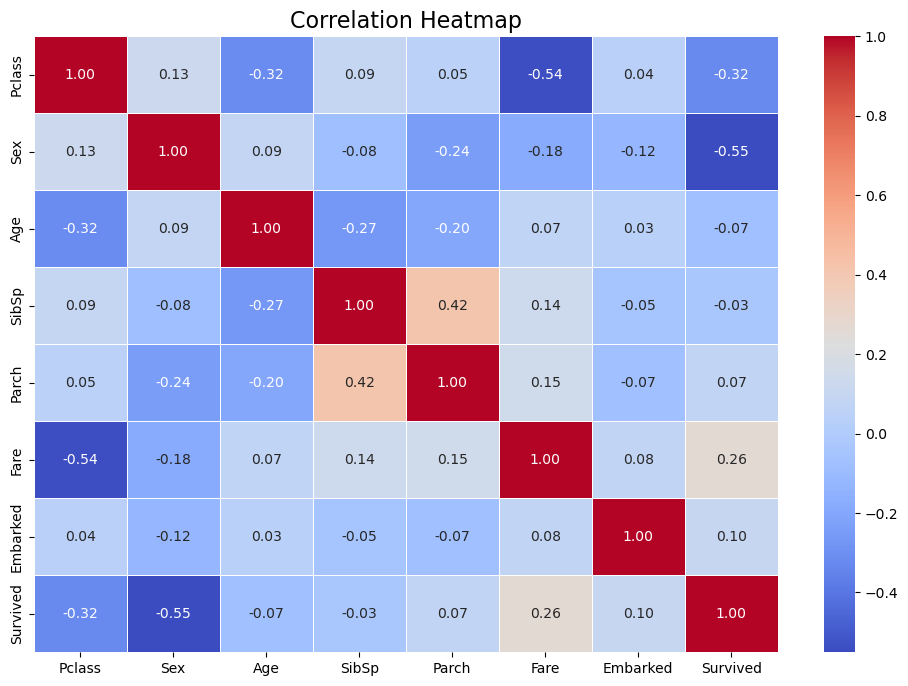

In [951]:
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation between features
sns.heatmap(
    train_data.corr(),              # Calculate the correlation matrix
    annot=True,                     # Annotate each cell with the correlation coefficient
    cmap='coolwarm',                # Set the color map
    fmt='.2f',                      # Format the annotation to two decimal places
    linewidths=.5,                  # Add lines between cells for better separation
)

# Set the title for the heatmap and dispaly 
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

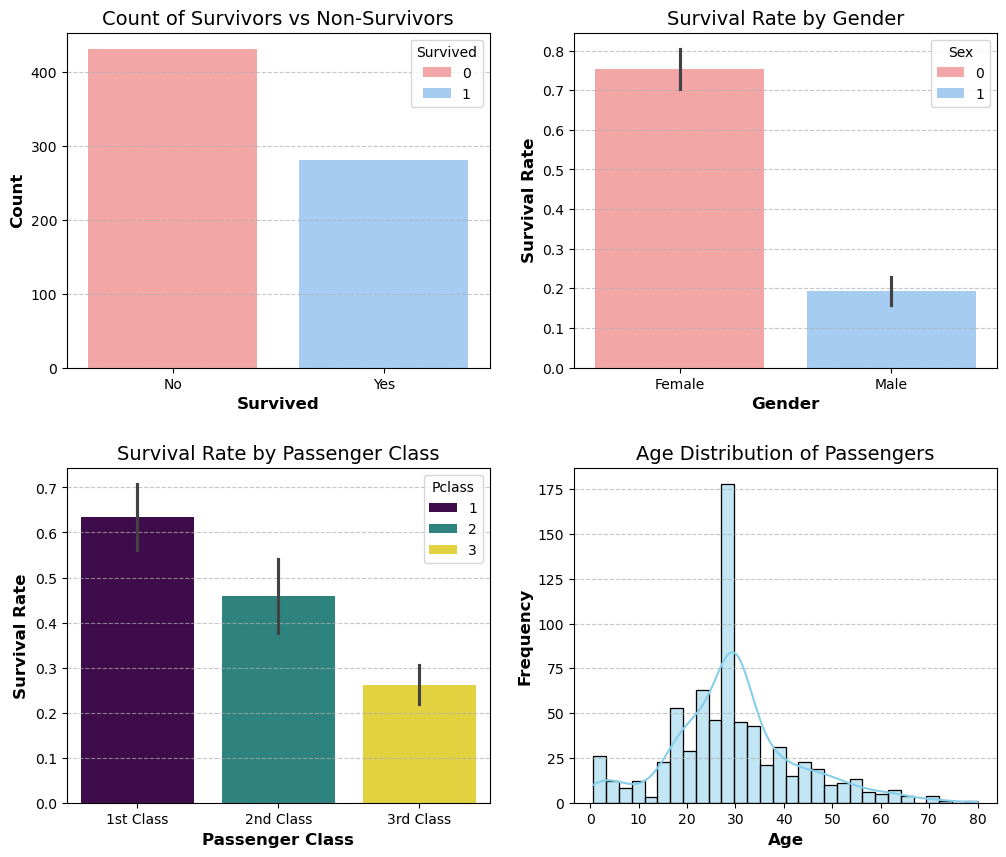

In [952]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Count plot showing the total number of survivors and non-survivors
sns.countplot(x='Survived', data=train_data, hue='Survived', palette=['#FF9999', '#99CCFF'], ax=axs[0, 0])
axs[0, 0].set_title('Count of Survivors vs Non-Survivors', fontsize=14)
axs[0, 0].set_xlabel('Survived', fontsize=12, fontweight='bold')
axs[0, 0].set_ylabel('Count', fontsize=12, fontweight='bold')
axs[0, 0].set_xticks([0, 1])
axs[0, 0].set_xticklabels(['No', 'Yes'])
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Bar plot showing the average survival rate based on gender
sns.barplot(x='Sex', y='Survived', data=train_data, hue='Sex', palette=['#FF9999', '#99CCFF'], ax=axs[0, 1])
axs[0, 1].set_title('Survival Rate by Gender', fontsize=14)
axs[0, 1].set_xlabel('Gender', fontsize=12, fontweight='bold')
axs[0, 1].set_ylabel('Survival Rate', fontsize=12, fontweight='bold')
axs[0, 1].set_xticks([0, 1])
axs[0, 1].set_xticklabels(['Female', 'Male'])
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Bar plot showing the average survival rate based on passenger class
sns.barplot(x='Pclass', y='Survived', data=train_data, hue='Pclass', palette='viridis', ax=axs[1, 0])
axs[1, 0].set_title('Survival Rate by Passenger Class', fontsize=14)
axs[1, 0].set_xlabel('Passenger Class', fontsize=12, fontweight='bold')
axs[1, 0].set_ylabel('Survival Rate', fontsize=12, fontweight='bold')
axs[1, 0].set_xticks([0, 1, 2])
axs[1, 0].set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Histogram to visualize the age distribution
sns.histplot(train_data['Age'].dropna(), kde=True, bins=30, color='skyblue', ax=axs[1, 1])
axs[1, 1].set_title('Age Distribution of Passengers', fontsize=14)
axs[1, 1].set_xlabel('Age', fontsize=12, fontweight='bold')
axs[1, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.subplots_adjust(hspace=0.3)
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed  

In [954]:
# Select features for scaling
features = ['Pclass', 'Age', 'Sex', 'SibSp', 'Fare', 'Parch', 'Embarked']

# Initialize MinMaxScaler to scale features between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler on the training data features
# This computes the minimum and maximum to be used for scaling
scaler.fit(train_data[features])

# Create copies of the original datasets for scaling
train_data_scaled = train_data.copy()
test_data_scaled = test_data.copy()

# Apply scaling to the training data features
train_data_scaled[features] = scaler.transform(train_data[features])

# Apply scaling to the test data features, This ensures that the test data is scaled in the same way as the training data
test_data_scaled[features] = scaler.transform(test_data[features])

# Display the first 5 rows of the scaled training and test data
print(" ")
print("First 5 rows of the scaled training data:")
display(train_data_scaled.head())

print("\nFirst 5 rows of the scaled test data:")
display(test_data_scaled.head())

 
First 5 rows of the scaled training data:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,-1.0,-1.0,0.344510,-0.75,-1.0,-0.694467,-0.333333,1
1,0.0,-1.0,0.117610,-1.00,-1.0,-0.947300,-1.000000,1
2,1.0,1.0,-0.512669,-1.00,-1.0,-0.962914,-1.000000,0
3,1.0,1.0,-0.109290,-1.00,-1.0,-0.969177,-1.000000,0
4,1.0,1.0,-0.462246,-1.00,-1.0,-0.968575,-1.000000,0



First 5 rows of the scaled test data:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,-0.134501,-1.0,-1.0,-0.972479,-1.000000,0
1,1.0,1.0,-0.260557,-1.0,-1.0,-0.971698,-1.000000,0
2,1.0,1.0,-0.268143,-1.0,-1.0,-0.943396,-1.000000,0
3,1.0,-1.0,-0.487457,-1.0,-1.0,-0.969746,0.333333,0
4,1.0,1.0,-0.210135,-1.0,-1.0,-0.779455,-1.000000,1


In [955]:
# Drop rows with missing values in the features and target column
# This ensures that the model only trains on complete data
train_data_scaled.dropna(subset=features + ['Survived'], inplace=True)

# Features (X) and target variable (y)
X_train = train_data_scaled[features]  # Select the features for training
y_train = train_data_scaled['Survived']  # Select the target variable

# Define the parameter grid for KNN
knn_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],  # Different values for the number of neighbors
    'knn__metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metrics to evaluate
}

# Create a pipeline that includes scaling and KNN
pipeline = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(-1, 1))),  # Step for MinMax Scaling
    ('knn', KNeighborsClassifier())  # Step for KNN classifier
])

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid=knn_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  # Fit the grid search on the training data

# Convert cross-validation results to a DataFrame for easy analysis
cv_results = pd.DataFrame(grid_search.cv_results_)

# Select relevant columns to display from the cross-validation results
options = ['param_knn__n_neighbors', 'mean_test_score', 'std_test_score']

# Display cross-validation results
metrics = ['euclidean', 'manhattan', 'chebyshev']

for metric in metrics:
    print(f"\n--- {metric.capitalize()} Distance ---")
    metric_results = cv_results[cv_results['param_knn__metric'] == metric].reset_index(drop=True)  
    display(metric_results[options])

# Output the best parameters and the best accuracy score from the grid search
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Display the best parameters and accuracy score found 
print(f"\nBest Parameters for KNN: {best_params}")  
print(f"Best Accuracy for KNN: {best_accuracy:.4f}") 



--- Euclidean Distance ---


,param_knn__n_neighbors,mean_test_score,std_test_score
0,3,0.796375,0.029280
1,5,0.785118,0.038930
2,7,0.780951,0.030819
3,9,0.778144,0.029190



--- Manhattan Distance ---


,param_knn__n_neighbors,mean_test_score,std_test_score
0,3,0.797794,0.025683
1,5,0.787935,0.034219
2,7,0.786536,0.021846
3,9,0.780942,0.026073



--- Chebyshev Distance ---


,param_knn__n_neighbors,mean_test_score,std_test_score
0,3,0.786536,0.029535
1,5,0.782311,0.031720
2,7,0.790761,0.036209
3,9,0.789314,0.023229



Best Parameters for KNN: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3}
Best Accuracy for KNN: 0.7978


In [956]:
# Define the parameter grid for Gaussian Naive Bayes
# This grid specifies the range of variance smoothing values to test
nb_grid = {
    'nb__var_smoothing': [1e-05, 1e-04, 1e-03, 1e-02, 1e-01]  # Variance smoothing parameters for Gaussian Naive Bayes
}

# Create a pipeline that includes scaling and Naive Bayes
pipeline = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(-1, 1))),  # Scaling features using MinMaxScaler to range between -1 and 1
    ('nb', GaussianNB())  # Step for Naive Bayes classifier
])

# Initialize GridSearch CV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid=nb_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)  # Fit the grid search on the training data

# Convert cross-validation results to a DataFrame for analysis
cv_results = pd.DataFrame(grid_search.cv_results_)

# Display the cross-validation accuracy scores with relevant columns
print("Cross-validation Accuracy Scores:")
# Show the parameter values along with mean and standard deviation of test scores
display(cv_results[['param_nb__var_smoothing', 'mean_test_score', 'std_test_score']])

# Output the best parameters and the best accuracy score from the grid search
best_params = grid_search.best_params_  # Retrieve the best parameters found
best_accuracy = grid_search.best_score_  # Retrieve the best accuracy score achieved

# Display the best parameters and accuracy score found 

print("\nBest Parameters for Naive Bayes:", best_params) 
print("Best Accuracy for Naive Bayes:", best_accuracy)  


Cross-validation Accuracy Scores:


,param_nb__var_smoothing,mean_test_score,std_test_score
0,0.00001,0.780892,0.031005
1,0.00010,0.780892,0.031005
2,0.00100,0.782291,0.030602
3,0.01000,0.790712,0.032939
4,0.10000,0.787925,0.031847



Best Parameters for Naive Bayes: {'nb__var_smoothing': 0.01}
Best Accuracy for Naive Bayes: 0.7907121047966118


In [957]:
# Initialize MinMaxScaler for feature scaling
scaler = MinMaxScaler()

# Define models to evaluate
models = {
    'KNN': KNeighborsClassifier(),  # K-Nearest Neighbors classifier
    'Naive Bayes': GaussianNB()     # Gaussian Naive Bayes classifier
}

# Define hyperparameter grids for each model
param_grids = {
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],  # Hyperparameter for number of neighbors
        'classifier__metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metrics options
    },
    'Naive Bayes': {
        'classifier__var_smoothing': [1e-07,1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 1e+00]  # Smoothing factor for Naive Bayes
    }
}

# Initialize a DataFrame to store results of grid search
results_df = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best F1 Score'])

# Define F1-macro scorer to compute F1 score across multiple classes
f1_macro_scorer = make_scorer(f1_score, average='macro')

# List to collect rows of results
rows = []

# Loop through each model and perform grid search with cross-validation
for model_name, model in models.items():
    # Create a pipeline that first scales the data, then applies the model
    pipeline = Pipeline([
        ('scaler', scaler),  # Scale features using MinMaxScaler
        ('classifier', model)  # Apply the current model (KNN or Naive Bayes)
    ])
    
    # Retrieve the hyperparameter grid for the current model
    param_grid = param_grids[model_name]
    
    # Perform GridSearchCV with 5-fold cross-validation and F1-macro score as the evaluation metric
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=f1_macro_scorer)
    grid_search.fit(X_train, y_train)  # Fit the grid search on the training data
    
    # Store the best parameters and best F1 score for the current model
    best_params = grid_search.best_params_  # Retrieve the best parameters found
    best_score = grid_search.best_score_    # Retrieve the best F1 score achieved
    
    # Append the results for the current model to the list
    rows.append({
        'Model': model_name,
        'Best Parameters': best_params,
        'Best F1 Score': best_score
    })

# Convert the list of results into a DataFrame
results_df = pd.DataFrame(rows)

# Print the results
print("Results for each model and parameter combination:")
display(results_df)  # Use display for a clearer output in notebooks


Results for each model and parameter combination:


,Model,Best Parameters,Best F1 Score
0,KNN,"{'classifier__metric': 'manhattan', 'classifie...",0.786029
1,Naive Bayes,{'classifier__var_smoothing': 0.01},0.779867


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [959]:
# Initialize MinMaxScaler with a range of -1 to 1 for feature scaling
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler on the training data and transform it
scaler.fit(train_data[features])  # Fit the scaler on the original training DataFrame
X_train_scaled = scaler.transform(train_data[features])  # Transform the training features to the scaled values

# Extract the target variable from the original DataFrame
y_train = train_data['Survived']  # Store the target variable for training

# Initialize KNN classifier with the best parameters from grid search
best_knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')  # Use the optimal parameters for KNN

# Train the KNN classifier on the scaled training data
best_knn.fit(X_train_scaled, y_train)  # Fit the model on the scaled features and target variable


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

## Part 5 - Apply on test and show model performance estimation

In [961]:
# Transform the test features using the same scaler fitted on the training data
X_test_scaled = scaler.transform(test_data[features])  # Transform test features

# Extract target variable from the test DataFrame
y_test = test_data['Survived']

# Predict the labels for the test set
y_pred = best_knn.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation results
print("Model Performance on Test Set:")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)

Model Performance on Test Set:
Accuracy: 0.8435754189944135

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       118
           1       0.77      0.77      0.77        61

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179

